In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
probePath = "./simpleColumn/postProcessing/probes/0.000/h"
widths = [14]*6
names = ['Time'] + [f"Probe {i}" for i in range(5)]
OpenFoamData = pd.read_fwf(probePath, widths=widths,skiprows=7,names=names)

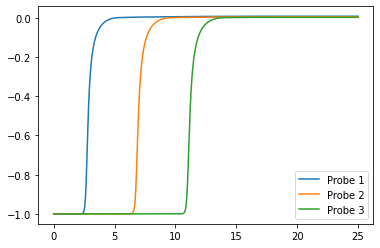

In [45]:
fig,ax = plt.subplots()
for probe in names[2:-1]:
    ax.plot(OpenFoamData['Time']/3600,OpenFoamData[probe],label=probe)
plt.legend()
#ax.plot(HydrusData['Time'],HydrusData['h Node(51)']/100)
plt.show()

In [6]:
probePath = "./simpleColumn_Hydrus1D/Orgogozo2014/ORGOGOZO/Obs_Node.out"
colspecs = [(9,18),(54,63)]
names = ['Time'] + ["h Node(51)"]
HydrusData = pd.read_fwf(probePath, colspecs=colspecs, skiprows=11,names=names)

In [11]:
probePath = "./simpleColumn_PFLOTRAN/100_z-obs-0.pft"
colspecs = [(2,16),(16,30),(58,71)]
names = ['Time'] + ["Liquid Pressure Pa","Capillary Pressure Pa"]
PFLOTRANData = pd.read_fwf(probePath, colspecs=colspecs, skiprows=1,names=names)
PFLOTRANData["h (m)"] = (PFLOTRANData["Liquid Pressure Pa"]-101325)/9806.38

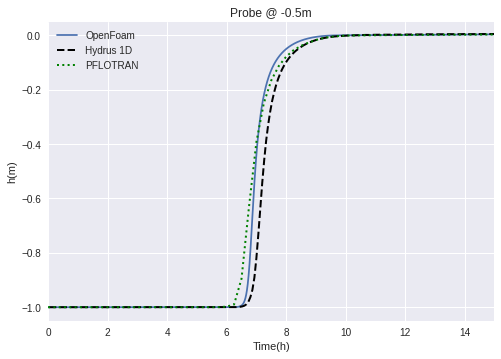

In [46]:
# with plt.xkcd():
with plt.style.context('seaborn'):
    fig,ax = plt.subplots()
    ax.plot(OpenFoamData['Time']/3600,OpenFoamData['Probe 2'],label="OpenFoam")
    ax.plot(HydrusData['Time'],HydrusData['h Node(51)']/100,ls='dashed',c='k',lw=2,label="Hydrus 1D")
    ax.plot(PFLOTRANData['Time'],PFLOTRANData['h (m)'],ls='dotted',c='g',lw=2, label="PFLOTRAN")
    ax.legend()
    ax.set(ylabel="h(m)",xlabel="Time(h)",title="Probe @ -0.5m",xlim=[0,15],ylim=[-1.05,.05])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()